In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from astropy.table import Table

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

## TESScut quick lightcurve

In [3]:
# https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=297.788835531591&dec=46.4833913684977&y=15&x=10&units=px&sector=14
# TIC 273589987

In [4]:
file = 'tess-s0014-2-4_297.788836_46.483391_10x15_astrocut.fits'

tbl = Table.read(file, format='fits')

In [5]:
tbl['FLUX'].shape

(1241, 15, 10)

In [6]:
np.sum(tbl['FLUX'], axis=0).shape

(15, 10)

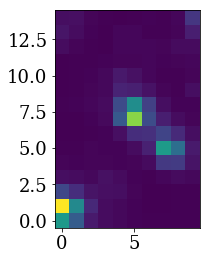

In [7]:
plt.imshow(np.sum(tbl['FLUX'], axis=0), origin='lower')

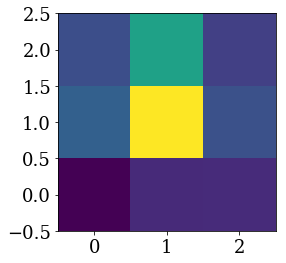

In [8]:
# plt.imshow(np.sum(tbl['FLUX'][:, 4:7, 6:], axis=0), origin='lower')
plt.imshow(np.sum(tbl['FLUX'][:, 6:9, 4:7], axis=0), origin='lower')

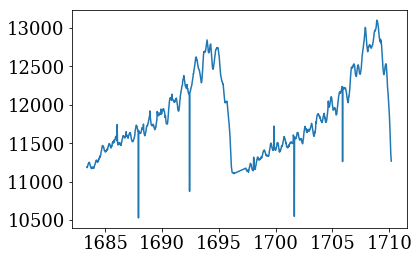

In [9]:
ap = np.nansum(tbl['FLUX'][:, 6:9, 4:7], axis=(1,2))

plt.plot(tbl['TIME'], ap)

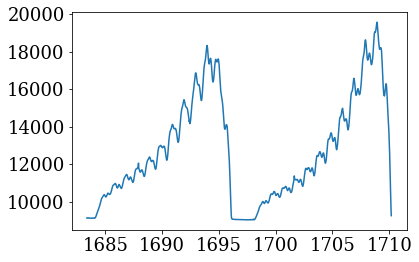

In [10]:
bk = np.nansum(tbl['FLUX'][:, 10:, :], axis=(1,2))
plt.plot(tbl['TIME'], bk)

In [3]:
from astropy import __version__ as v
v

'3.2.1'

In [4]:
import eleanor
eleanor.__version__

'0.2.8'

In [66]:
star = eleanor.Source(tic=273589987, sector=14, tc=True)

Inflating...


In [100]:
star.tic

273589987

In [70]:
data = eleanor.TargetData(star, do_psf=True, do_pca=False) 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



100%|██████████| 1241/1241 [00:17<00:00, 69.44it/s]


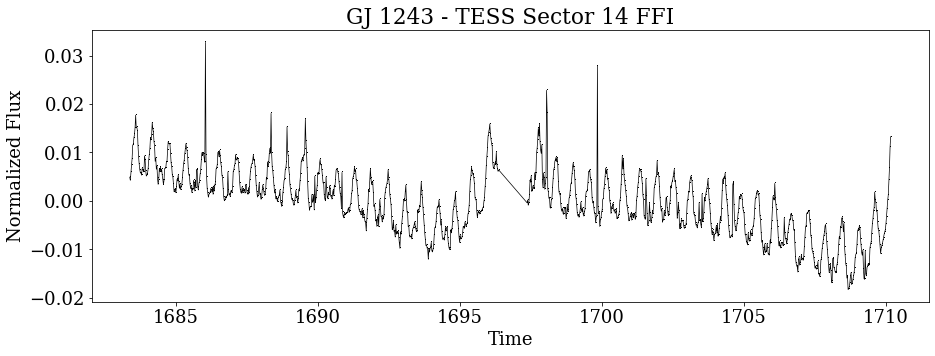

In [86]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1 , 'k',marker=',', lw=0.7)

plt.ylabel('Normalized Flux')
plt.xlabel('Time')
plt.title('GJ 1243 - TESS Sector 14 FFI')
plt.savefig('gj1243_tess_rough.png')

In [98]:
# sc = eleanor.Crossmatch.two_minute(star, download=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


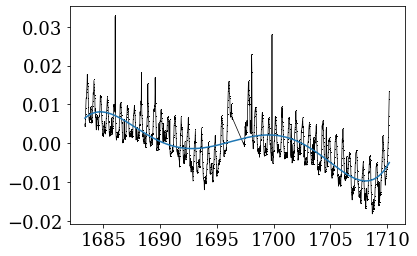

In [118]:
plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1 , 'k',marker=',', lw=0.7)

ft = np.polyfit(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1, 11)
plt.plot(data.time[q], np.polyval(ft, data.time[q]))

In [72]:
import exoplanet as xo

In [76]:
acf = xo.autocorr_estimator(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1 )

In [77]:
acf['peaks'][0]['period']

0.582758881519112

In [78]:
lnp = xo.lomb_scargle_estimator(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1, 
                                min_period=0.2, max_period=5)

In [79]:
freq, pwr = lnp['periodogram']

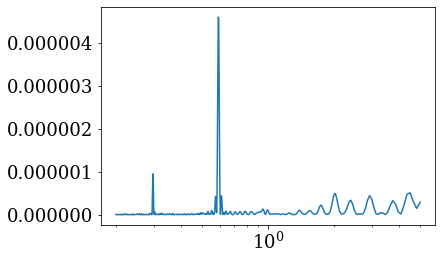

In [80]:
plt.plot(1./freq, pwr)
plt.xscale('log')

In [81]:
lnp['peaks'][0]['period']

0.5922754004818223

In [63]:
period = lnp['peaks'][0]['period']

(-0.02, 0.025)

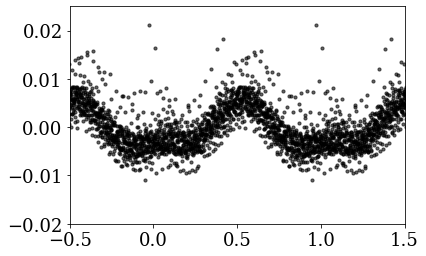

In [122]:

plt.scatter((data.time[q] % period) / period, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - np.polyval(ft, data.time[q]), 
            s=10, alpha=0.6, c='k')
plt.scatter((data.time[q] % period) / period+1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - np.polyval(ft, data.time[q]), 
            s=10, alpha=0.6, c='k')
plt.scatter((data.time[q] % period) / period-1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - np.polyval(ft, data.time[q]), 
            s=10, alpha=0.6, c='k')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.02,0.025)



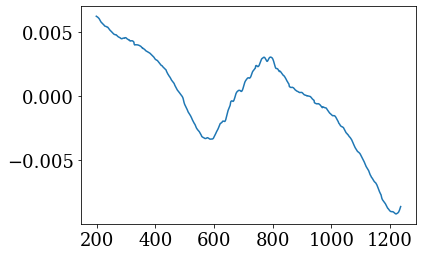

In [272]:
smo = pd.Series(data.psf_flux[q]/np.median(data.psf_flux[q])-1).rolling(200).mean()
plt.plot(smo)

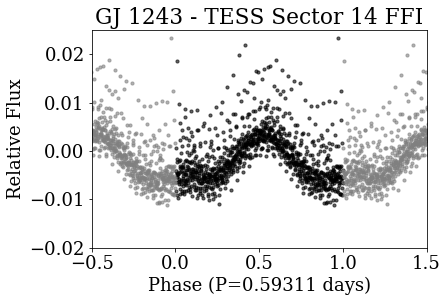

In [273]:

plt.scatter((data.time[q] % period) / period, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - smo, 
            s=10, alpha=0.6, c='k')
plt.scatter((data.time[q] % period) / period+1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - smo, 
            s=10, alpha=0.6, c='grey')
plt.scatter((data.time[q] % period) / period-1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - smo, 
            s=10, alpha=0.6, c='grey')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.02,0.025)
plt.title('GJ 1243 - TESS Sector 14 FFI')
plt.xlabel('Phase (P='+format(period,'.5f')+' days)')
plt.ylabel('Relative Flux')
plt.savefig('gj1243_phase_rough.png')

In [274]:
format(period,'.5f')

'0.59311'

In [337]:
# Superwasp folded period: 0.59261473 

# final period used in GJ 1243 - Kepler starspot paper
per_orig = 0.5925961953623503

BJD0 = 2454833. # Kepler time zeropoint
TJD0 = 2457000. # TESS time zeropoint

EPHEM = 0.11497024 # used to phase superwasp

Text(0, 0.5, 'Relative Flux')

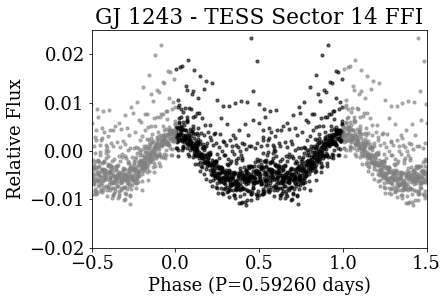

In [276]:

plt.scatter((data.time[q] % per_orig) / per_orig, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - smo, 
            s=10, alpha=0.6, c='k')
plt.scatter((data.time[q] % per_orig) / per_orig+1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - smo, 
            s=10, alpha=0.6, c='grey')
plt.scatter((data.time[q] % per_orig) / per_orig-1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - smo, 
            s=10, alpha=0.6, c='grey')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.02,0.025)
plt.title('GJ 1243 - TESS Sector 14 FFI')
plt.xlabel('Phase (P='+format(per_orig,'.5f')+' days)')
plt.ylabel('Relative Flux')

In [157]:
from lightkurve.search import search_lightcurvefile

In [206]:
lc0 = search_lightcurvefile('9726699', quarter=0, mission='Kepler', cadence='long').download()

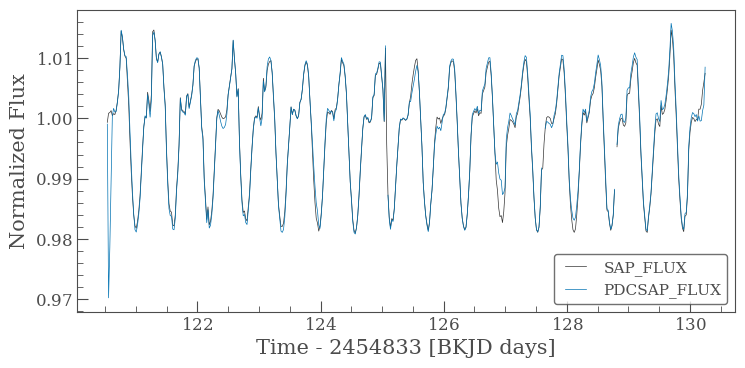

In [207]:
lc0.plot()

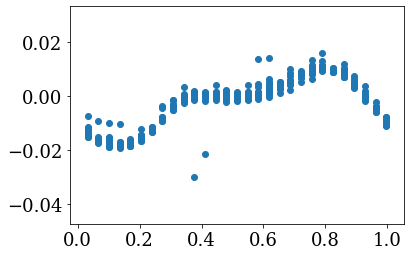

In [266]:
kep=lc0.PDCSAP_FLUX

qk = kep.quality == 0

plt.scatter(((kep.time[qk] + BJD0) % per_orig)/per_orig, 
            kep[qk].flux/np.nanmedian(kep[qk].flux) - 1)

In [285]:
np.hstack((kep.time, kep.time, kep.time)).shape

(946,)

In [297]:
from scipy.stats import binned_statistic

def phase_mean(phase, flux, Nbins=100, stat='mean'):
    bins = np.linspace(-0.5, 1.5, Nbins)
    
    cln = np.isfinite(flux)
    ss = np.argsort(phase[cln])

    xd = np.hstack((phase[cln][ss]-1, phase[cln][ss], phase[cln][ss]+1))
    yd = np.hstack((flux[cln][ss], flux[cln][ss], flux[cln][ss]))
    bin_means, bin_edges, binnumber = binned_statistic(xd, yd, statistic=stat, 
                                                       bins=bins)
    bin_centers = (bin_edges[1:] + bin_edges[0:-1])/2
    ok = np.isfinite(bin_means)
    return bin_centers[ok], bin_means[ok]
#     model = np.interp(x_i, bin_centers, bin_means)

Text(0, 0.5, 'Relative Flux')

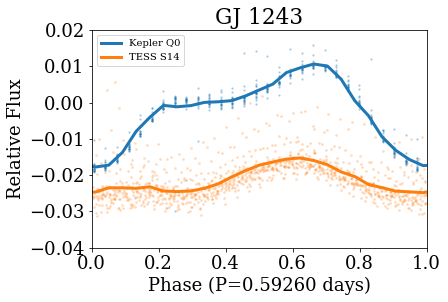

In [305]:

xk = ((kep.time - EPHEM) % per_orig)/per_orig
yk = kep.flux/np.nanmedian(kep.flux) - 1
plt.scatter(xk, yk, s=2, alpha=0.25, c='C0')


xm,ym = phase_mean(xk, yk, Nbins=50)
plt.plot(xm,ym, lw=3, label='Kepler Q0')

# obnoxiously, convert time from TJD into KeplerBJD, so this EPHEM works too
xt = ((data.time[q] + TJD0 - BJD0 - EPHEM) % per_orig) / per_orig
yt = data.psf_flux[q]/np.median(data.psf_flux[q])-1-smo.values - 0.02
plt.scatter(xt, yt, s=3, alpha=0.2,c='C1')

xx,yy = phase_mean(xt, yt, Nbins=50)
plt.plot(xx,yy, lw=3, label='TESS S14')


plt.legend(fontsize=10)

plt.xlim(0,1)
plt.ylim(-0.04,0.02)
plt.title('GJ 1243')
plt.xlabel('Phase (P='+format(per_orig,'.5f')+' days)')
plt.ylabel('Relative Flux')

In [308]:
# superwasp:
sw = pd.read_csv('swasp.tbl', delim_whitespace=True, skiprows=3, names=('x', 'HJD', 'tammag2'), usecols=(1,2))
sw.shape

(6164, 2)

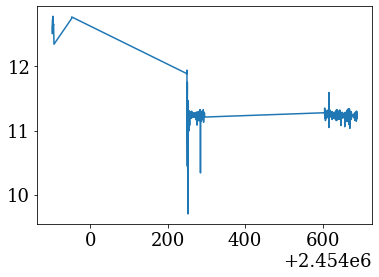

In [332]:
plt.plot(sw['HJD'], sw['tammag2'])

Text(0, 0.5, 'Relative Flux')

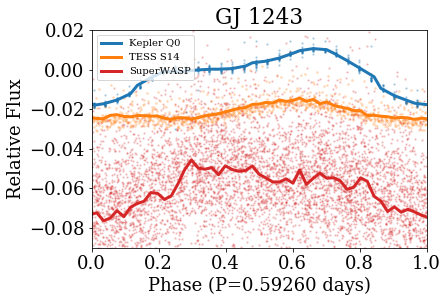

In [385]:

xk = ((kep.time - EPHEM) % per_orig)/per_orig
yk = kep.flux/np.nanmedian(kep.flux) - 1
plt.scatter(xk, yk, s=2, alpha=0.25, c='C0')


xxk,yyk = phase_mean(xk, yk, Nbins=100)
plt.plot(xxk,yyk, lw=3, label='Kepler Q0')

# obnoxiously, convert time from TJD into KeplerBJD, so this EPHEM works too
xt = ((data.time[q] + TJD0 - BJD0 - EPHEM) % per_orig) / per_orig
yt = data.psf_flux[q]/np.median(data.psf_flux[q])-1-smo.values
plt.scatter(xt, yt - 0.02, s=3, alpha=0.2,c='C1')

xxt,yyt = phase_mean(xt, yt, Nbins=100)
plt.plot(xxt,yyt - 0.02, lw=3, label='TESS S14')


sok = (sw['HJD']-2.454e6 > 200) & (sw['tammag2']> 11) & (sw['tammag2'] < 12)
xs = ((sw['HJD'].values[sok]-BJD0-EPHEM) % per_orig)/per_orig
ys = 10**((np.nanmedian(sw['tammag2'][sok]) - sw['tammag2'].values[sok])/2.5)-1
plt.scatter(xs,ys-0.06, alpha=0.2, s=2, c='C3')
plt.ylim(-0.2,0.2)

xxs,yys = phase_mean(xs, ys, Nbins=100)
plt.plot(xxs,yys-0.06, lw=3, label='SuperWASP', c='C3')


plt.legend(fontsize=10)

plt.xlim(0,1)
plt.ylim(-0.09,0.02)
plt.title('GJ 1243')
plt.xlabel('Phase (P='+format(per_orig,'.5f')+' days)')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

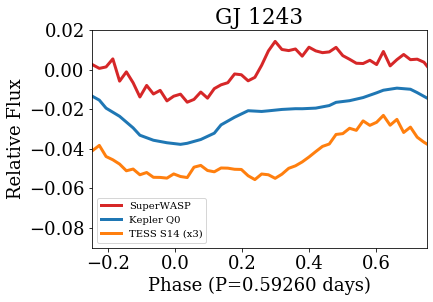

In [386]:
plt.plot(xxs,yys, lw=3, label='SuperWASP', c='C3')
plt.plot(xxk,yyk - 0.02, lw=3, label='Kepler Q0')
plt.plot(xxt,yyt*3 - 0.04, lw=3, label='TESS S14 (x3)')

plt.legend(fontsize=10)

plt.xlim(-0.25,.75)
plt.ylim(-0.09,0.02)
plt.title('GJ 1243')
plt.xlabel('Phase (P='+format(per_orig,'.5f')+' days)')
plt.ylabel('Relative Flux')

In [373]:
# plt.scatter(kep.time/365, kep.flux/np.nanmedian(kep.flux) -1, c='C0')
# plt.scatter((data.time[q] + TJD0 - BJD0)/365, data.psf_flux[q]/np.median(data.psf_flux[q])-1-smo.values, c='C1')
# plt.scatter((sw['HJD'].values[sok]-BJD0)/365,10**((np.nanmedian(sw['tammag2'][sok]) - sw['tammag2'].values[sok])/2.5)-1, c='C3')
# plt.ylim(-0.03, 0.03)
# plt.xlim(-3,11)

In [363]:
max((data.time[q] + TJD0 - BJD0)/365) - min((sw['HJD'].values[sok]-BJD0)/365)

12.22093755396925

In [387]:
def tau(mass): 
    ''' 
    Write up the Eqn 11 from Wright (2011) that gives the
    convective turnover timescale, used in Rossby number calculation (Ro =
    Prot / tau) 
    
    Parameters 
    ---------- 
    mass : float relative to solar 
    
    Returns
    ------- 
    tau (in days) 
    ''' 
    log_tau = 1.16 - 1.49 * np.log10(mass) - 0.54 * np.log10(mass)**2. 
    return 10.**log_tau

In [388]:
tau(0.2)

86.62503244871078

In [ ]:
# make a 2-sin model, fit the secondary starspot evolution in Kepler, 
# project forward into TESS: is the shoulder where we expect it should be?